# Домашнее задание по теме "Работа с переменными"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

## 1. Получение данных и загрузка их в dataframe

In [2]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [3]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHCost'] = housing.target

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHCost
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.shape

(20640, 9)

## 2. Проверка данных на наличие пропусков

In [7]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MedHCost      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MedHCost    20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Все признаки содержат числовые значения. Пропусков в наборе данных нет.

## 3. Разделение данных на обучающую и тестовую выборки

## 4. Обучение модели линейной регрессии и вычисление метрик

Зададим функцию, которая будет разбивать датафрейм на обучающую и тестовую подвыборки, обучать модель линейной регрессии и выподить на экран значения mse и r2

In [9]:
def get_scores(df, random_seed=5):
    
    """Возвращает словарь со значениями mse и r2"""

    X = df[df.columns[:-1]]
    y = df[['MedHCost']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    score_dict = {"Train_mse":[train_mse], "Test_mse":[test_mse], "Train_r2":[train_r2], "Test_r2":[test_r2]}
    return score_dict

In [10]:
score_df = pd.DataFrame(get_scores(df))
score_df

,Train_mse,Test_mse,Train_r2,Test_r2
0,0.52144,0.536343,0.604792,0.611257


## 5.График распределения целевой переменной

In [11]:
df.describe()[['MedHCost']]

,MedHCost
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


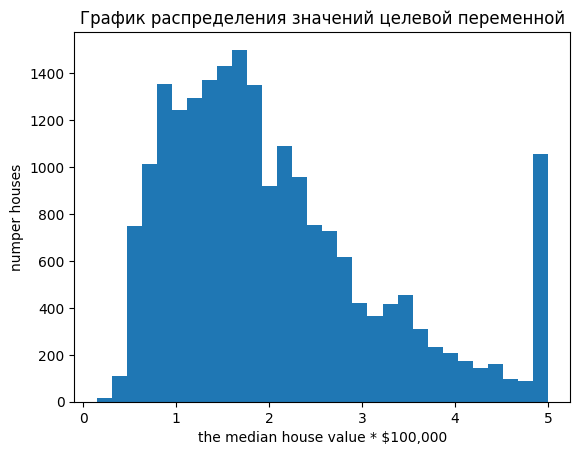

In [12]:
plt.hist(df.MedHCost, bins=30)
plt.title('График распределения значений целевой переменной')
plt.xlabel('the median house value * $100,000')
plt.ylabel('numper houses')
plt.show()

**Вывод**: Распределение значений целевого признака визуально несколько отлично от нормального (имеются признаки бимодальности). Выборока несколько смещена к более низким значениям цены на недвижимость, однако имеется значительное количество домов с высокой стоимостью. Явные выбросы отсутсвуют. Пик, расположенный в правой части графика нельзя считать выбросом. 

## 6. Построение корреляционной матрицы

In [13]:
corr_matrix = df[df.columns[:-1]].corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [14]:
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

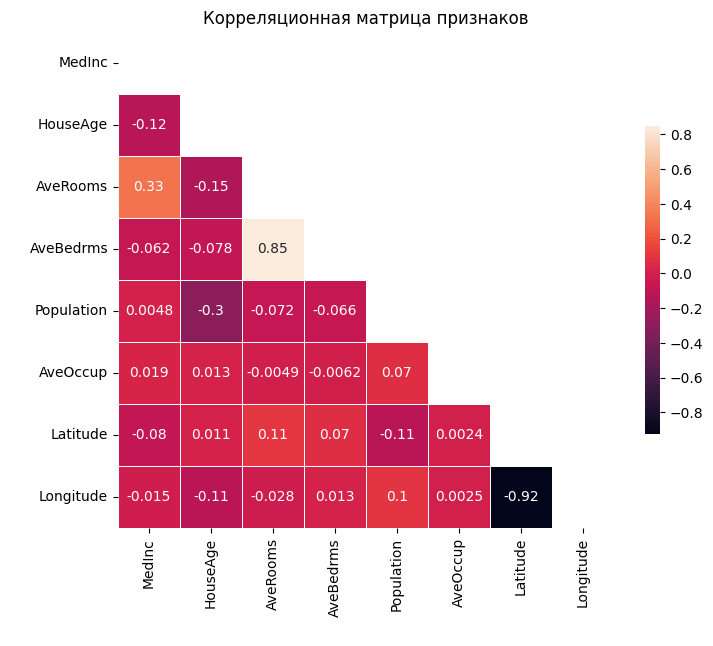

In [15]:
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corr_matrix,
            annot=True,
            mask=mask,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5}
           )
plt.title('Корреляционная матрица признаков')
plt.xlabel(' '); plt.ylabel(' ')
plt.show()

- Имеется сильная положительная корреляционная связь между значениями признаков **AveRooms** (среднее количество комнат) и **AveBedrms** (среднее количество спален). Можно удалить один из этих признаков из нашей выборки.
- Имеется сильная отрицательная связь между значениями **Latitude** (широты) и **Longitude** (долготы). Не уверен, что стоит удалять какои-либо из них. Но можно попробовать.

### Удалим поочередно и попарно каждый из признаков, обучим модeли и сравним результаты:

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHCost
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
drop_list = [['AveBedrms'],
             ['AveRooms'],
             ['Latitude'],
             ['Longitude'],
             ['AveBedrms', 'Latitude'],
             ['AveBedrms', 'Longitude'],
             ['AveRooms', 'Latitude'],
             ['AveRooms', 'Longitude'],
            ]

In [18]:
def get_drop(df, drop_list):
    df_list = [pd.DataFrame(get_scores(df), index=[0])]
    for index, val in enumerate(drop_list, start=1):
        df_new = df.drop(columns=val)
        lm = get_scores(df_new)
        df_ = pd.DataFrame(lm, index=[index])
        df_list.append(df_)   
    return pd.concat(df_list)

In [19]:
get_drop_results = get_drop(df, drop_list)
get_drop_results

,Train_mse,Test_mse,Train_r2,Test_r2
0,0.521440,0.536343,0.604792,0.611257
1,0.536103,0.544129,0.593679,0.605614
2,0.530766,0.540977,0.597724,0.607898
3,0.608412,0.624552,0.538875,0.547322
4,0.605862,0.621889,0.540808,0.549252
5,0.645254,0.650040,0.510952,0.528849
6,0.636853,0.642654,0.517320,0.534202
7,0.647836,0.656041,0.508995,0.524499
8,0.637991,0.646310,0.516456,0.531552


**Вывод**: удаление сильно коррелирующих между собой признков не приводит к улучшению качества модели, возможно, в этом случае лучше будет применить уменьшение размерности.

## 7. Исследование признаков на выбросы

Визуально оценим наличие выбросов в значениях признаков:

In [20]:
columns_names = df.columns[:-1]

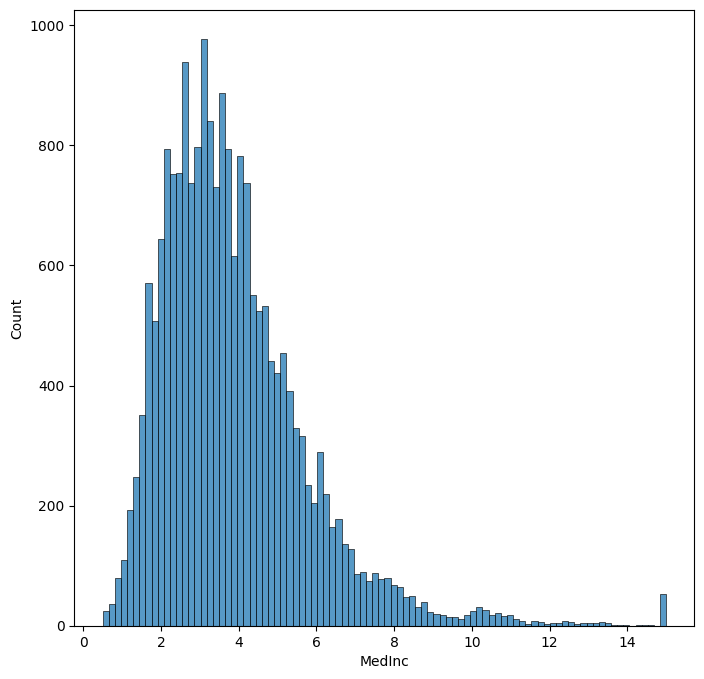

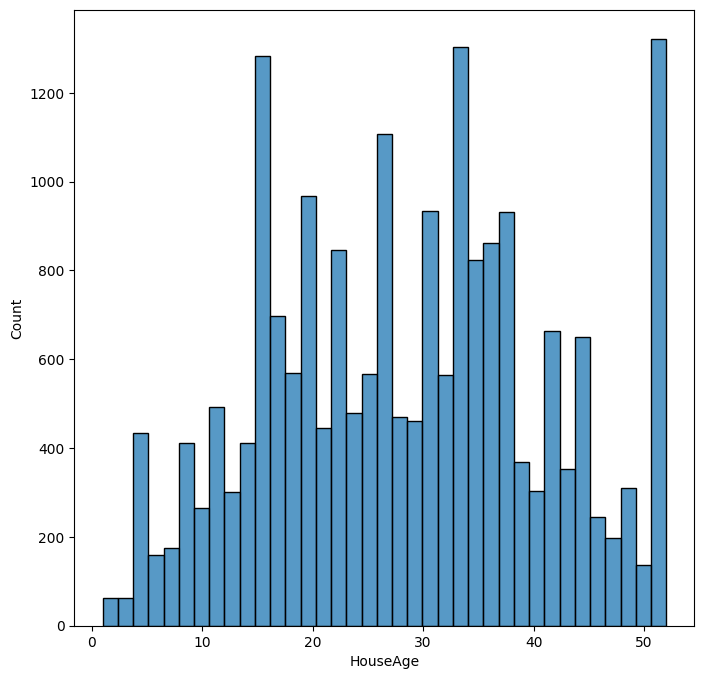

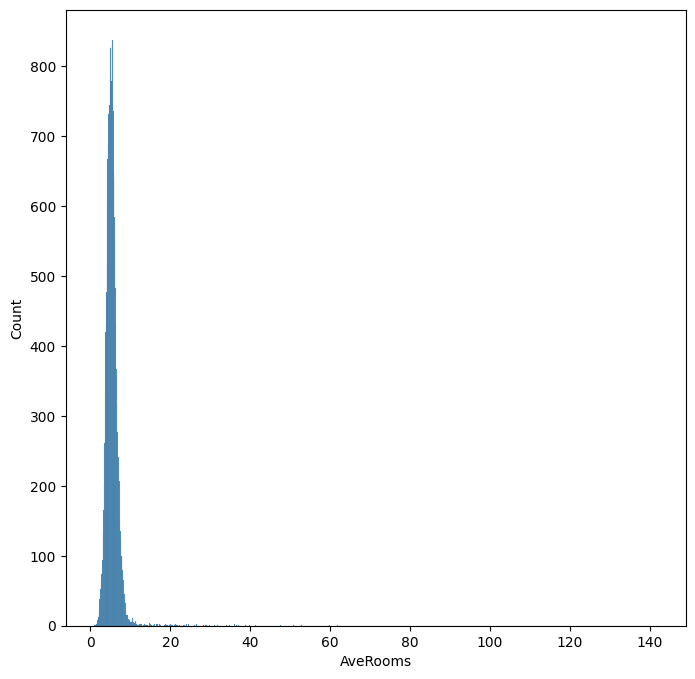

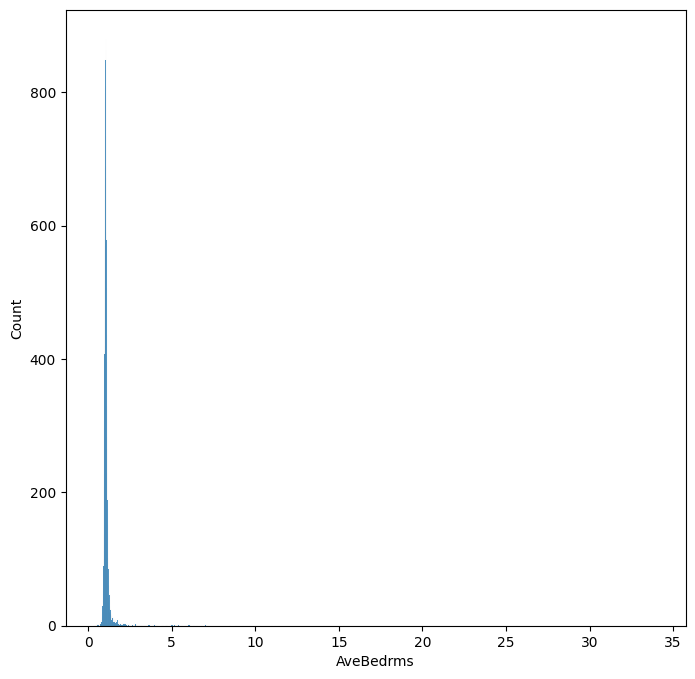

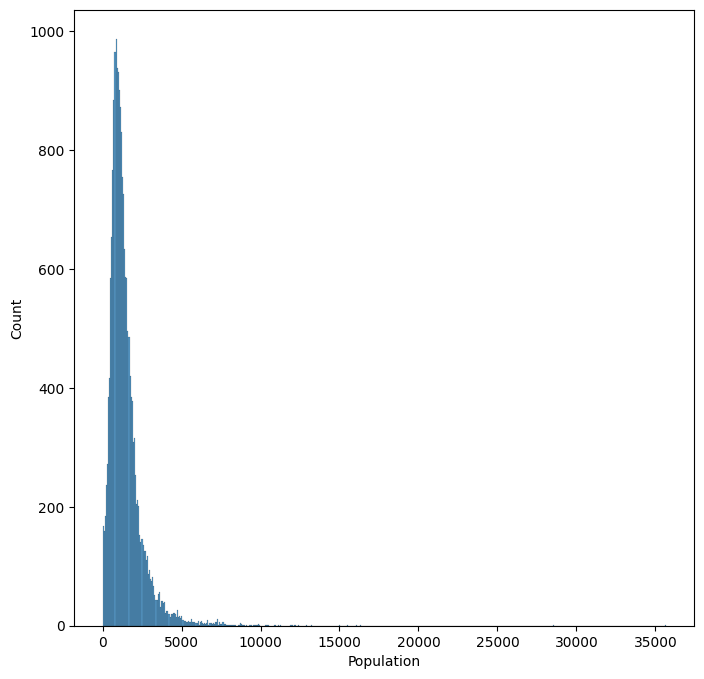

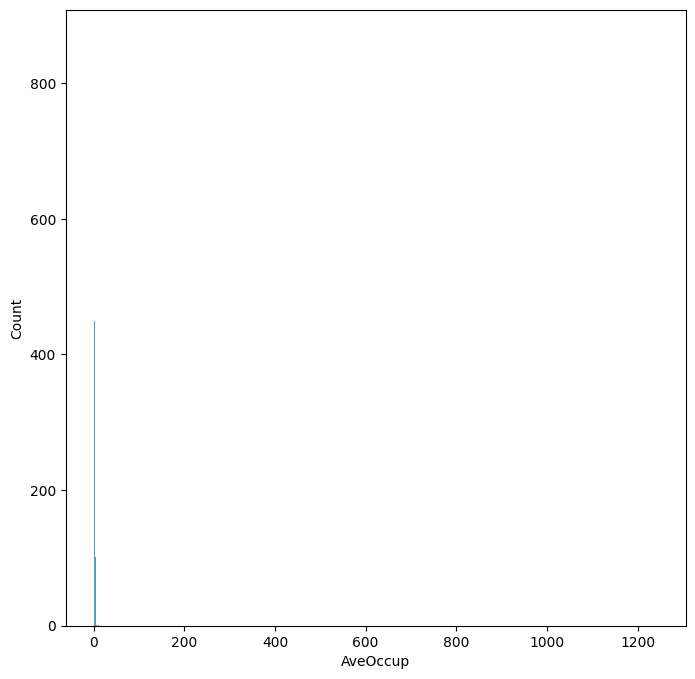

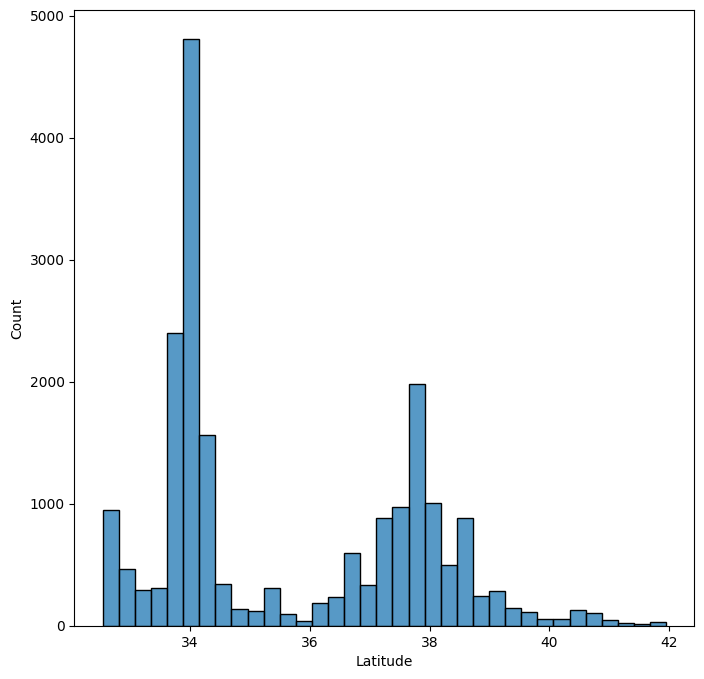

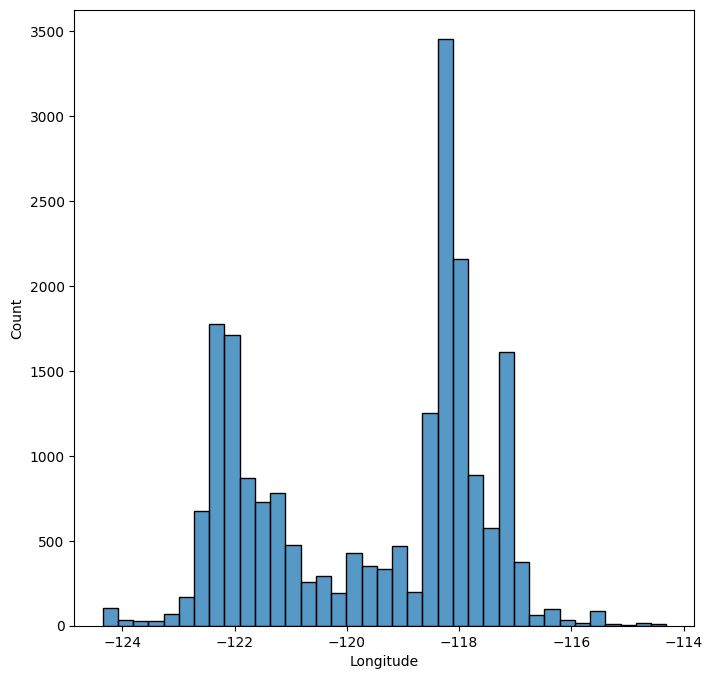

In [21]:
for i in columns_names:
    f, ax = plt.subplots(figsize=(8, 8))
    sns.histplot(x = df[i])
    plt.show()

**Вывод**: Выбросы явно ноблюдаются в значениях следующих признаков: 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'

### Удаляем выбросы:

In [22]:
outliers_col = ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [23]:
def drop_outliers(df, col):
    df = df.copy()
    for i in col:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    return df

In [24]:
new_df = drop_outliers(df, outliers_col)

### Смотрим, что получилось в результате:

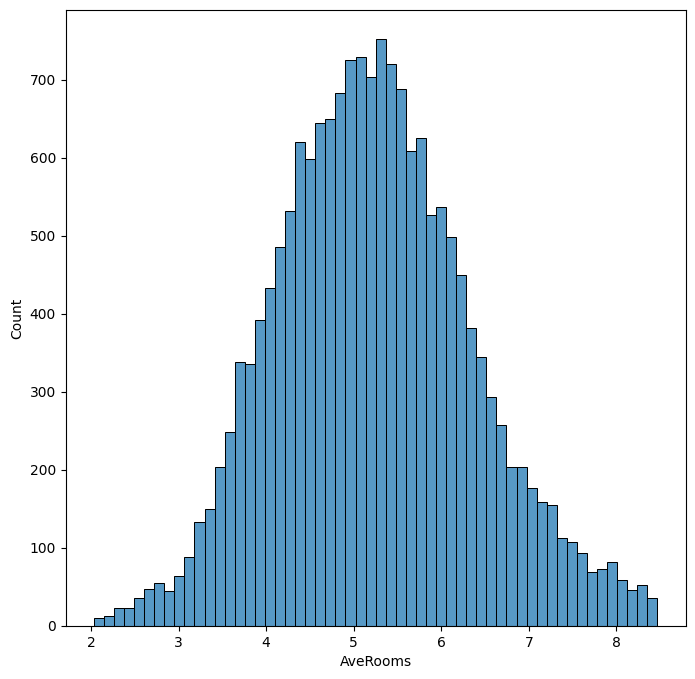

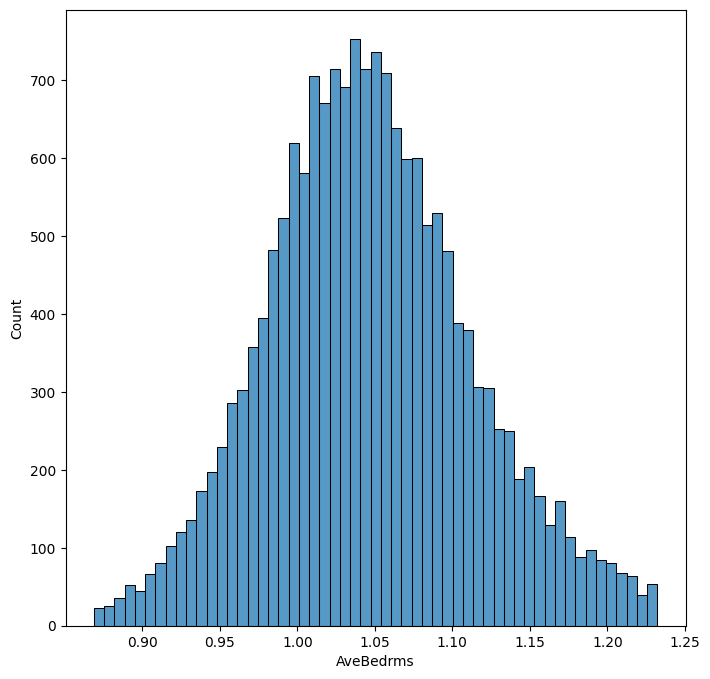

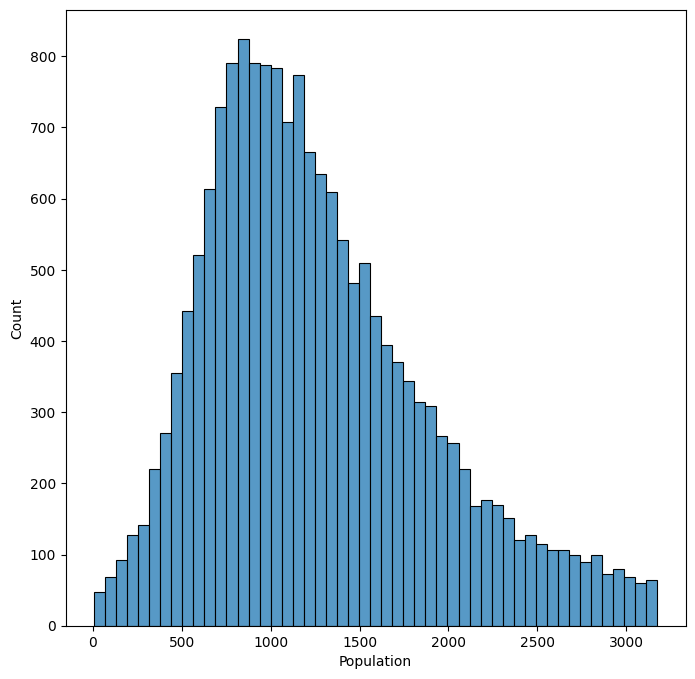

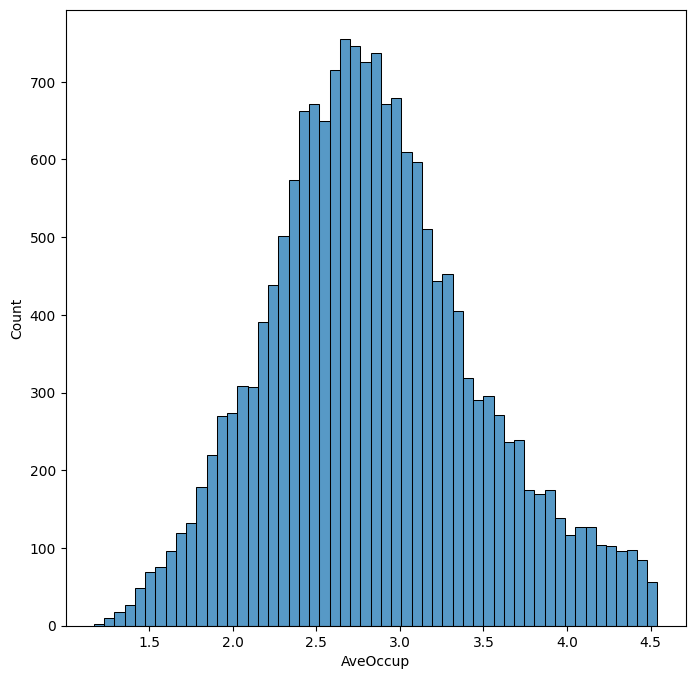

In [25]:
for i in outliers_col:
    f, ax = plt.subplots(figsize=(8, 8))
    sns.histplot(x = new_df[i])
    plt.show()

**Результат**: Получилось очень неплохо. Распределения значений четырех измененных признаков приблизились визуально к нормальному.

### Обучим модель на выборке без выбросов:

In [26]:
drop_outliers_results = pd.concat([
    pd.DataFrame(get_scores(df), index=['df']),
    pd.DataFrame(get_scores(new_df), index=['new_df'])
])
drop_outliers_results

,Train_mse,Test_mse,Train_r2,Test_r2
df,0.521440,0.536343,0.604792,0.611257
new_df,0.423984,0.401327,0.679550,0.686377


**Вывод**: Значения метрик после удаления выбросов улучшились. Далее будем работать с измененным датасетом **new_df**

### 8. Логарифмирование признака MedInc

<Axes: xlabel='MedInc', ylabel='Count'>

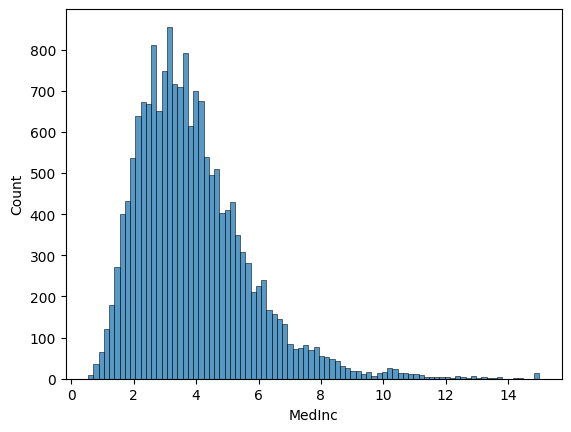

In [27]:
sns.histplot(x = new_df['MedInc'])

In [28]:
def get_log(df, col):
    df = df.copy()
    for i in col:
        df[i] = np.log(df[i])
    return df

In [29]:
log_list = ['MedInc']

In [30]:
log_df = get_log(df, log_list)

In [31]:
log_df_2 = get_log(new_df, log_list)

<Axes: xlabel='MedInc', ylabel='Count'>

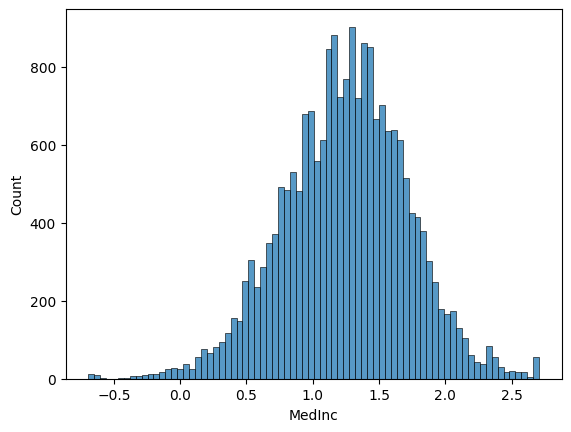

In [32]:
sns.histplot(x = log_df.MedInc)

In [33]:
get_log_results = pd.concat([
    pd.DataFrame(get_scores(df), index=['df']),
    pd.DataFrame(get_scores(new_df), index=['new_df']),
    pd.DataFrame(get_scores(log_df), index=['log_df']),
    pd.DataFrame(get_scores(log_df_2), index=['log_new_df'])
])
get_log_results

,Train_mse,Test_mse,Train_r2,Test_r2
df,0.521440,0.536343,0.604792,0.611257
new_df,0.423984,0.401327,0.679550,0.686377
log_df,0.593484,0.593954,0.550189,0.569500
log_new_df,0.493965,0.472474,0.626657,0.630778


**Вывод**: Логарифмирование ухудшило метрики как модели, обученной на первичном датасете, так и модели, построенной на датасете **new_df**.

## 9. Выводы

В работы были проделаны следующие изменения:
- удаление сильно коррелирующих между собой признаков;
- удаление выбросов;
- логарифмирование значений признака.

Удаление сильно коррелирующих между собой признаков не вривело к улучшению показателей по сравнению с первичной моделью (index = 0):

In [34]:
get_drop_results

,Train_mse,Test_mse,Train_r2,Test_r2
0,0.521440,0.536343,0.604792,0.611257
1,0.536103,0.544129,0.593679,0.605614
2,0.530766,0.540977,0.597724,0.607898
3,0.608412,0.624552,0.538875,0.547322
4,0.605862,0.621889,0.540808,0.549252
5,0.645254,0.650040,0.510952,0.528849
6,0.636853,0.642654,0.517320,0.534202
7,0.647836,0.656041,0.508995,0.524499
8,0.637991,0.646310,0.516456,0.531552


Довольно неплохо улучшило качество модели удаление выбросов:

In [35]:
drop_outliers_results

,Train_mse,Test_mse,Train_r2,Test_r2
df,0.521440,0.536343,0.604792,0.611257
new_df,0.423984,0.401327,0.679550,0.686377


Логарифмирование ухудшило метрики как модели, обученной на первичном датасете, так и модели, построенной на датасете **new_df**

In [36]:
get_log_results

,Train_mse,Test_mse,Train_r2,Test_r2
df,0.521440,0.536343,0.604792,0.611257
new_df,0.423984,0.401327,0.679550,0.686377
log_df,0.593484,0.593954,0.550189,0.569500
log_new_df,0.493965,0.472474,0.626657,0.630778


В результате наиболее эффективным оказалось удаление выбросов.